In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

####################
####################
## GRAND EST 2020 ##
# PYR. AGE I vs NI #
####################
####################

# Charger uniquement la feuille "Figure 1"
file_path = "data/INSEE_pyr_age_grand_est.xlsx"
df = pd.read_excel(file_path, sheet_name="Figure 1")

# Afficher les premières lignes pour comprendre la structure
df.head(15)

language = 'fr'
source = 'Eurostat'
champ = 'Union Européenne, France, Allemagne, Italie, Espagne'
print('B - Results')

if language == 'fr':
        label_for = "Etrangers"
        label_immig = "Immigrés"
        label_non_immig = "Non-immigrés"
        label_for_immig = "Immigré étrangers"
        label_born_fr_ab = "Né français à l\'étranger"
        label_demo = "Démographie"
        label_lec = "Lecture"
        label_champ = "Champ"
        label_annee = "Année"
elif language == 'en':
        label_for = "Foreigners"
        label_immig = "Immigrants"
        label_non_immig = "Non-immigrants"
        label_for_immig = "Foreign immigrants"
        label_born_fr_ab = "Born french abroad"
        label_demo = "Demography"
        label_lec = "Reading"
        label_champ = "Scope"
        label_annee = "Year"

def set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, width, fontsize):
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    if language == 'fr':
        lecture = lecture_fr 
        title = title_fr 
        source = source_fr
        note = note_fr
    elif language == 'en':
        lecture = lecture_en
        title = title_en
        source = source_en
        note = note_en
    ax.set_xlabel(label_x, fontsize=fontsize )
    ax.set_title(title, fontsize=fontsize)
    if note == "":      
        ax.text(0, -0.2, label_lec+f': '+lecture+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.27, label_champ+f': '+champ+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.34, f'Source: '+source+".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
    else:      
        ax.text(0, -0.25, f'Note: '+note+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.37, label_lec+f': '+lecture+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.44, label_champ+f': '+champ+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.51, f'Source: '+source+".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)

B - Results


In [7]:
# Nettoyage : suppression des premières lignes inutiles et renommage des colonnes
df_clean = df.iloc[4:].copy()
df_clean.columns = ["Âge", "Immigrés_Femmes", "Immigrés_Hommes", "NonImmigrés_Femmes", "NonImmigrés_Hommes"]

# Réinitialisation de l’index
df_clean.reset_index(drop=True, inplace=True)

# Conversion des colonnes numériques
for col in df_clean.columns[1:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# Vérification du résultat nettoyé
df_clean.head(10)


,Âge,Immigrés_Femmes,Immigrés_Hommes,NonImmigrés_Femmes,NonImmigrés_Hommes
0,0 an,0.152211,0.189705,1.004432,1.112971
1,1 an,0.202625,0.231693,1.036222,1.123620
2,2 ans,0.238315,0.248167,1.066937,1.182975
3,3 ans,0.286710,0.316857,1.101375,1.223096
4,4 ans,0.336021,0.362665,1.113341,1.231346
5,5 ans,0.362877,0.407855,1.153299,1.275751
6,6 ans,0.435902,0.465167,1.161500,1.279889
7,7 ans,0.411371,0.519564,1.176471,1.301342
8,8 ans,0.418951,0.518828,1.185354,1.304876
9,9 ans,0.521271,0.562838,1.209787,1.307530


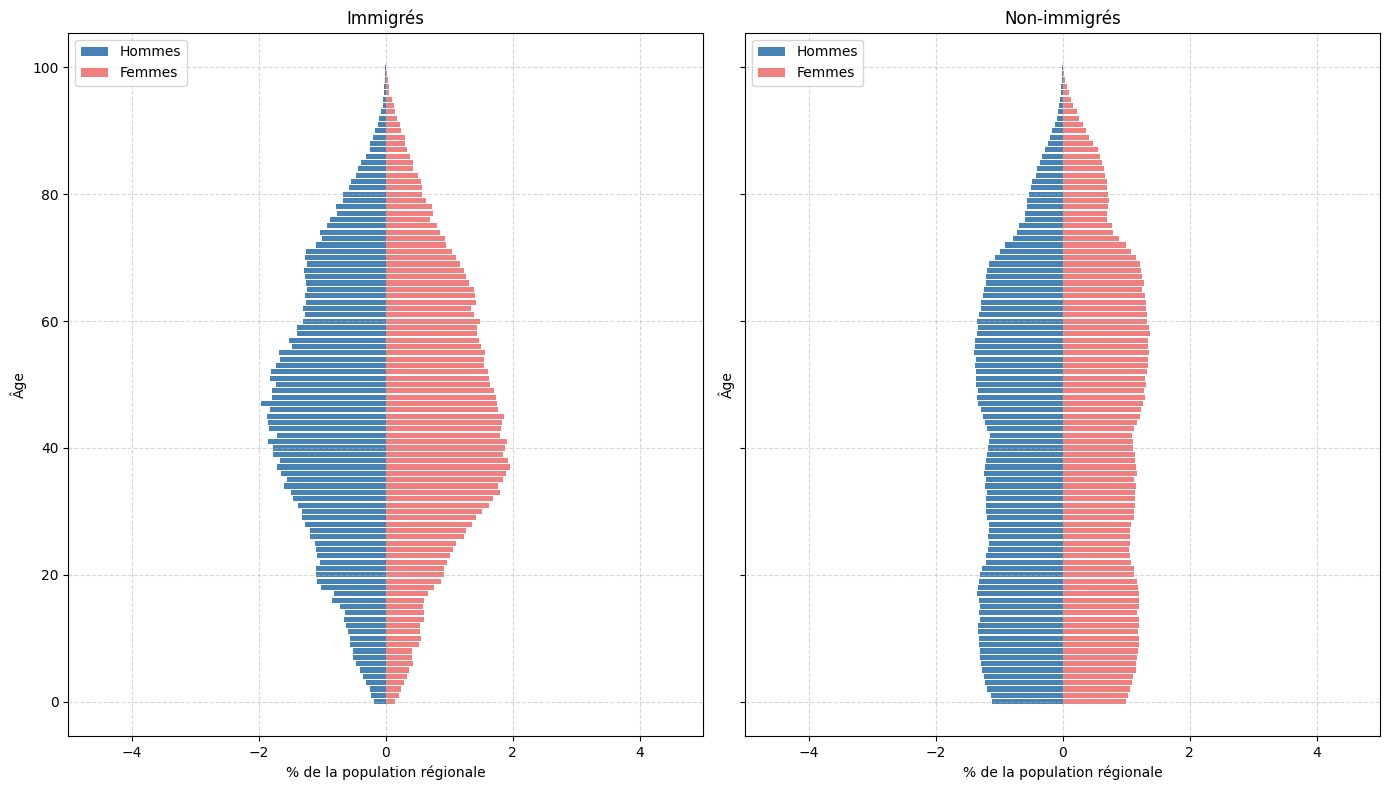

In [11]:
df = df_clean.copy()

# Préparer les données pour le graphique
ages = df.index

# Négatif pour les hommes pour que la pyramide soit correcte
immigres_hommes = -df["Immigrés_Hommes"]
immigres_femmes = df["Immigrés_Femmes"]
nonimmigres_hommes = -df["NonImmigrés_Hommes"]
nonimmigres_femmes = df["NonImmigrés_Femmes"]

fig, axs = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

# Pyramide des immigrés
axs[0].barh(ages, immigres_hommes, color="steelblue", label="Hommes")
axs[0].barh(ages, immigres_femmes, color="lightcoral", label="Femmes")
axs[0].set_title("Immigrés")
axs[0].set_xlabel("% de la population régionale")
axs[0].legend()

# Pyramide des non-immigrés
axs[1].barh(ages, nonimmigres_hommes, color="steelblue", label="Hommes")
axs[1].barh(ages, nonimmigres_femmes, color="lightcoral", label="Femmes")
axs[1].set_title("Non-immigrés")
axs[1].set_xlabel("% de la population régionale")
axs[1].legend()

# Mise en forme commune
for ax in axs:
    ax.set_xlim(-5, 5)
    ax.set_ylabel("Âge")
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


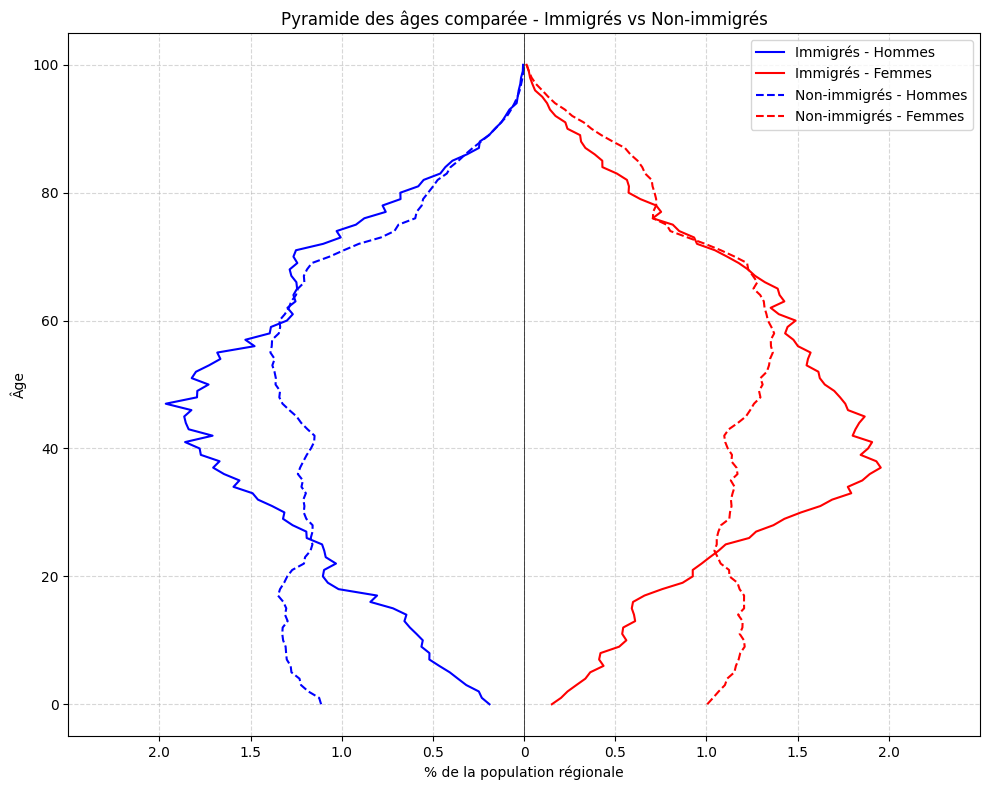

In [9]:
# Copy of cleaned data
df = df_clean.copy()

# Préparer les données
ages = df.index

# Pour les courbes, on utilise des lignes (line plot)
immigres_hommes = -df["Immigrés_Hommes"]
immigres_femmes = df["Immigrés_Femmes"]
nonimmigres_hommes = -df["NonImmigrés_Hommes"]
nonimmigres_femmes = df["NonImmigrés_Femmes"]

# Création du graphique
plt.figure(figsize=(10, 8))

# Immigrés
plt.plot(immigres_hommes, ages, color="blue", linestyle='-', label="Immigrés - Hommes")
plt.plot(immigres_femmes, ages, color="red", linestyle='-', label="Immigrés - Femmes")

# Non-immigrés
plt.plot(nonimmigres_hommes, ages, color="blue", linestyle='--', label="Non-immigrés - Hommes")
plt.plot(nonimmigres_femmes, ages, color="red", linestyle='--', label="Non-immigrés - Femmes")

# Mise en forme
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Pyramide des âges comparée - Immigrés vs Non-immigrés")
plt.xlabel("% de la population régionale")
plt.ylabel("Âge")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlim(-2.5, 2.5)

xticks = [-2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0]
plt.xticks(xticks, [str(abs(x)) for x in xticks])

plt.tight_layout()

plt.show()

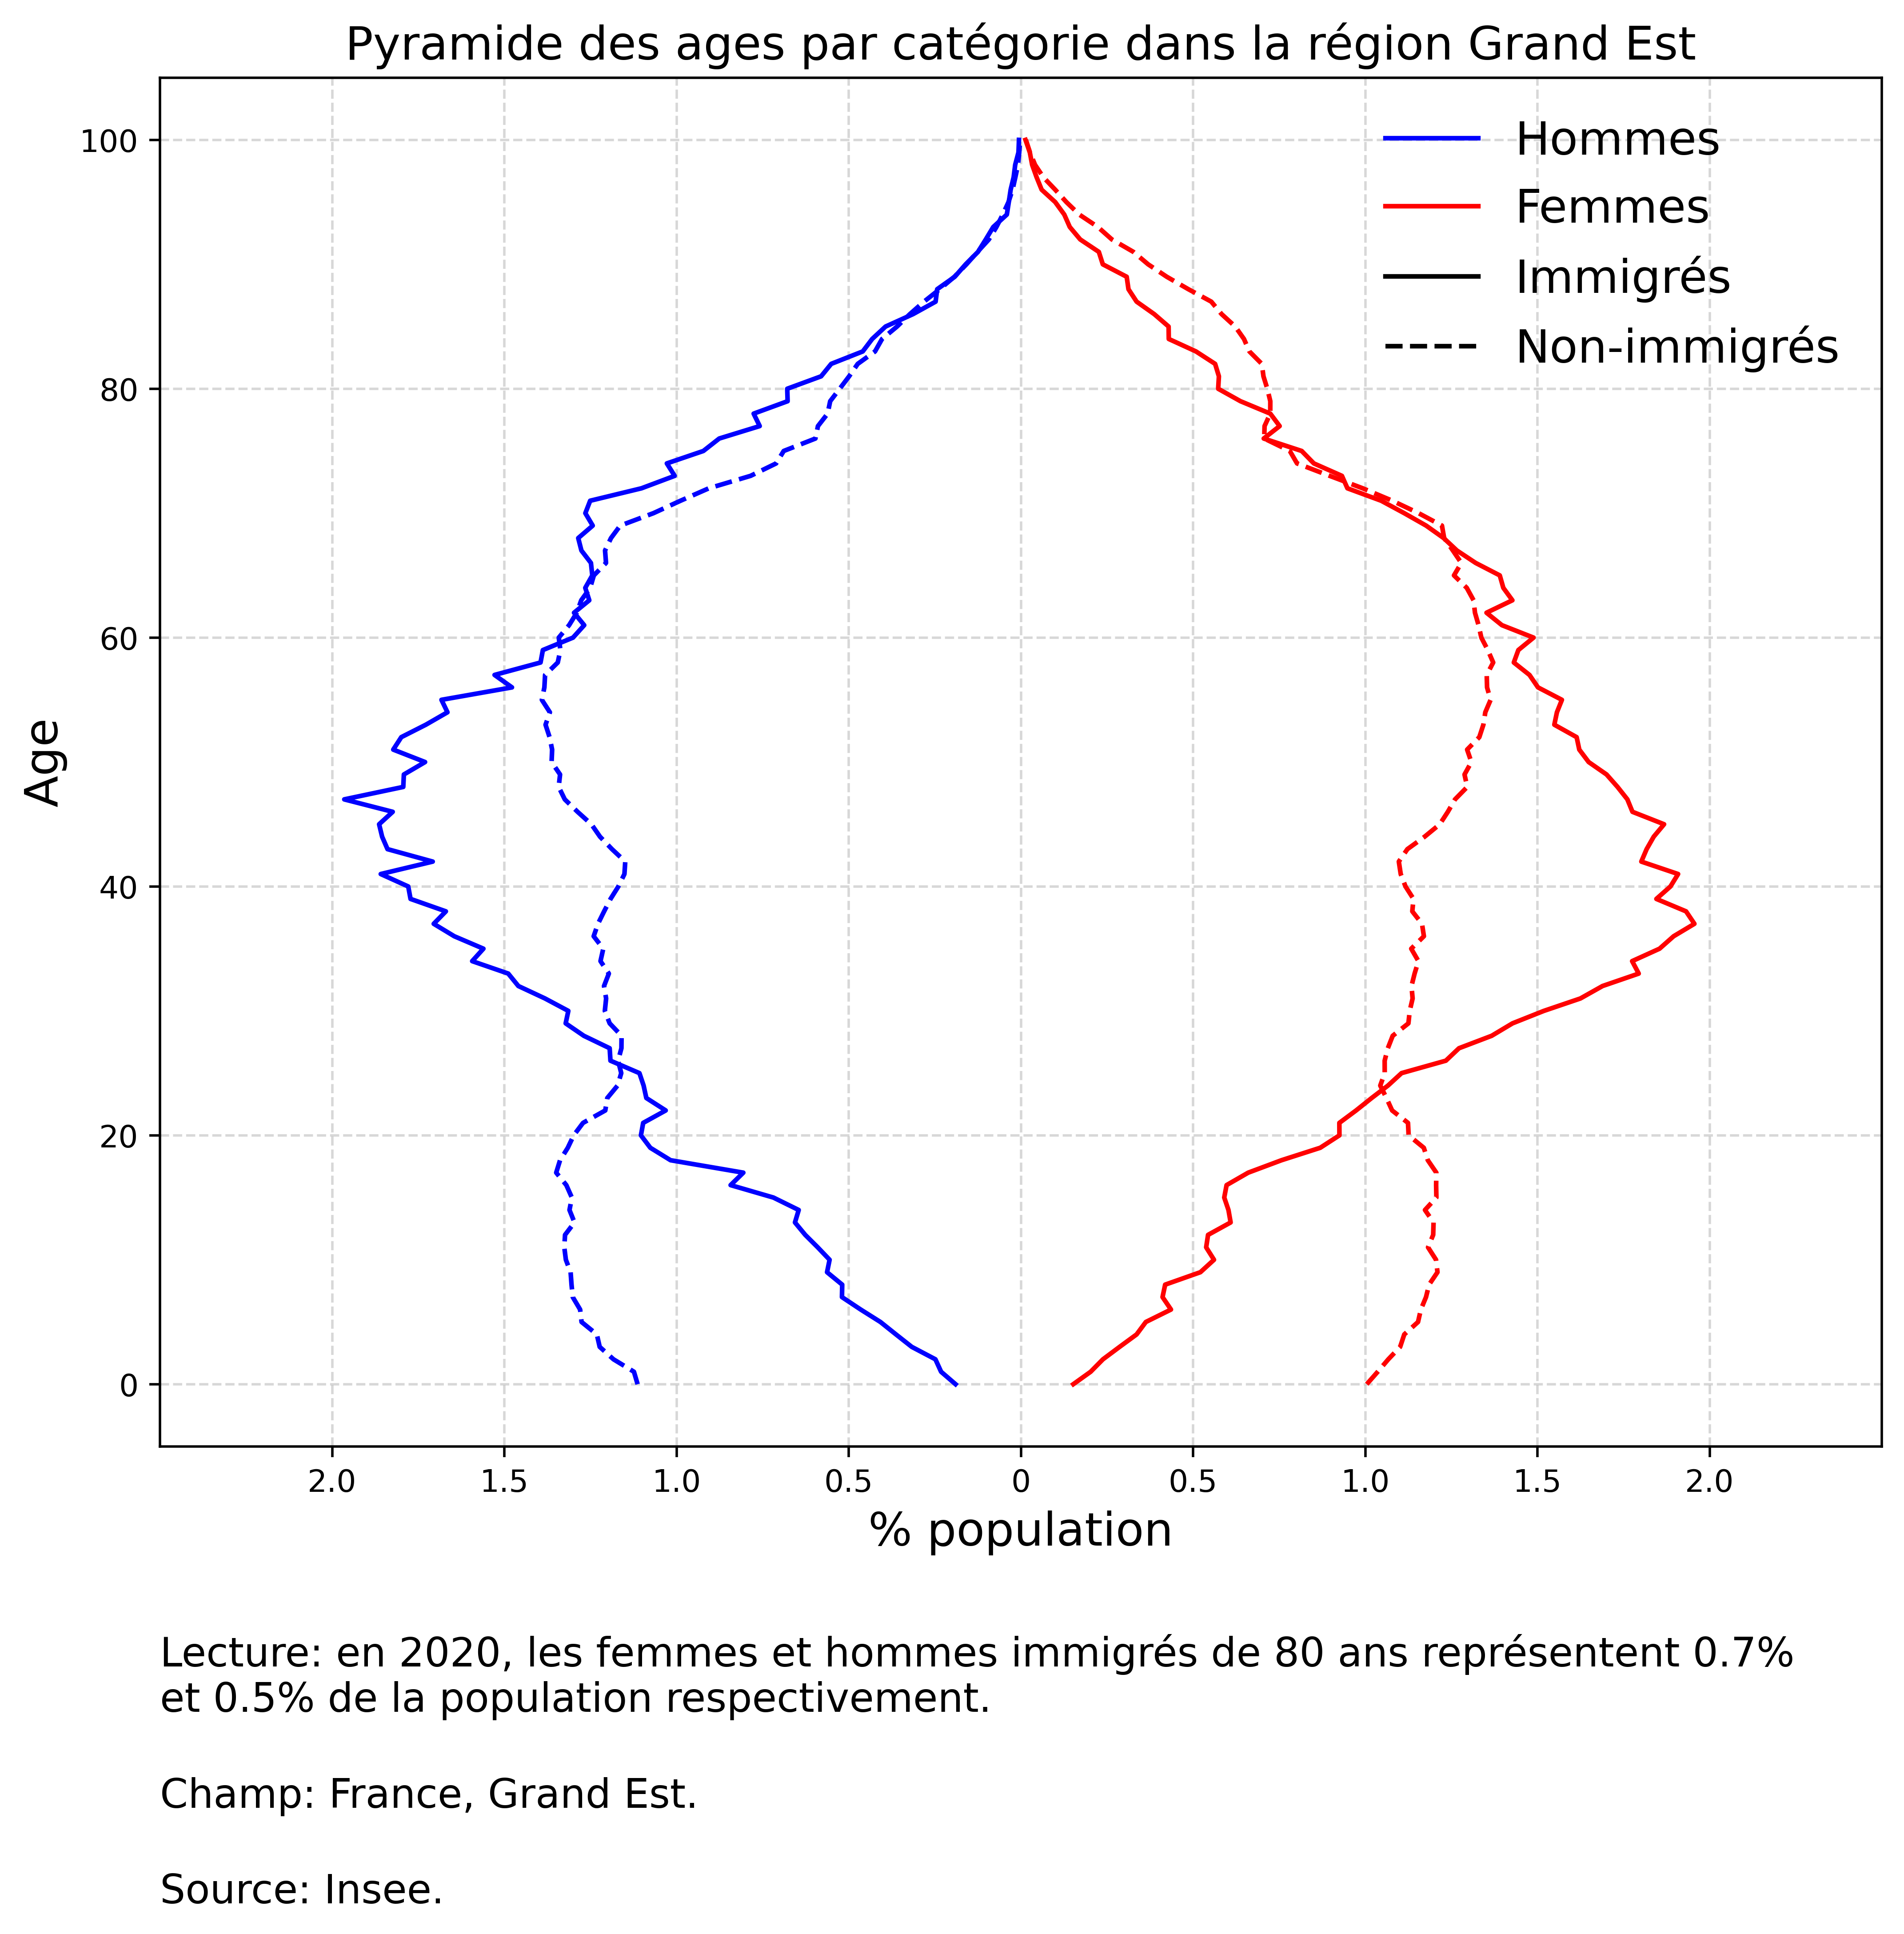

In [34]:
#### pyr age grand est 2020 ###

# Copy of cleaned data
df = df_clean.copy()

# Préparer les données
ages = df.index

# Pour les courbes, on utilise des lignes (line plot)
immigres_hommes = -df["Immigrés_Hommes"]
immigres_femmes = df["Immigrés_Femmes"]
nonimmigres_hommes = -df["NonImmigrés_Hommes"]
nonimmigres_femmes = df["NonImmigrés_Femmes"]

fig, ax = plt.subplots(figsize=(10, 8), dpi=500)

source_fr = "Insee"
source_en = "Insee"
language = 'fr'
champ = 'France, Grand Est'

width = 2.5
fontsize = 15

# read the graph
lecture_fr = f"en 2020, les femmes et hommes immigrés de 80 ans représentent 0.7%\net 0.5% de la population respectivement"
lecture_en = f""
title_fr = "Pyramide des ages par catégorie dans la région Grand Est"
title_en = "Estimated immigrant exits"
note_fr = ""
note_en = ""
label_fr = "Age"
label_en = "Age"

label_x = '% population'

if language == 'fr':
    label_y = label_fr
    label_leg = label_leg_fr
elif language == 'en':
    label_y = label_en
    label_leg = label_leg_en

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, width, fontsize)

# Immigrés
ax.plot(immigres_hommes, ages, color="blue", linestyle='-', label="Hommes")
ax.plot(immigres_femmes, ages, color="red", linestyle='-', label="Femmes")

# Non-immigrés
ax.plot(nonimmigres_hommes, ages, color="blue", linestyle='--', label="")
ax.plot(nonimmigres_femmes, ages, color="red", linestyle='--', label="")

ax.set_ylabel(label_y, fontsize=fontsize)

immigre_line = Line2D([0], [0], color='black', linestyle='-', label='Immigrés')
nonimmigre_line = Line2D([0], [0], color='black', linestyle='--', label='Non-immigrés')

ax.legend(frameon=False, fontsize=fontsize, handles=[
    Line2D([0], [0], color="blue", linestyle='-', label="Hommes"),
    Line2D([0], [0], color="red", linestyle='-', label="Femmes"),
    immigre_line,
    nonimmigre_line
])

ax.set_xlim(-2.5, 2.5)

xticks = [-2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0]
ax.set_xticks(xticks, [str(abs(x)) for x in xticks])

plt.savefig(f"plots/immig_france_grd_est_2020_py_age_"+language+f".png", dpi=500, bbox_inches='tight')